In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
%matplotlib inline 
import plotly_express as px
import matplotlib.pyplot as mp

In [25]:
df = pd.read_csv(r'BODO_ML_covariates_2208.csv')

# df = pd.read_csv(r'woodburn_ML_0_30cm_no_outliers.csv')

df = df.rename(columns={'sampling_r': 'period'})
df = df.rename(columns={'cea_name':'CEA'})
df = df.rename(columns={'property_n':'property_name'})
df = df.rename(columns={'core_120_c':'carbon_core_120'})
df = df.rename(columns={'core_carbon_mass':'carbon_core_30'})


df = df.drop(['field_1','actual_lat','actual_lon'], axis = 1)
df.head()

,property_name,CEA,strata_nam,period,core_numbe,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
0,Bonnie Doone Property,1,1,T1,5464,83.495461,36.03293,32.05450,5.56868,6.84590,...,9415459.0,2.62721,20.80505,97.87849,2.77983,0.17190,0.06275,0.1898,0.0794,4.51403
1,Bonnie Doone Property,1,1,T1,5465,66.072313,36.69437,28.51077,8.42459,6.11087,...,8227138.0,1.81609,26.40673,110.56564,2.64108,0.16201,0.06295,0.2038,0.0802,2.45615
2,Bonnie Doone Property,1,1,T1,5466,99.682242,33.11657,31.95604,4.57981,8.82289,...,8048531.0,4.56878,27.02259,113.34035,2.69087,0.20499,0.06088,0.1751,0.0795,18.27759
3,Bonnie Doone Property,1,1,T1,5467,41.952111,40.79656,27.02616,7.24964,6.33211,...,7866613.0,1.55527,28.66734,114.05368,2.66351,0.14616,0.07887,0.2310,0.1005,2.57038
4,Bonnie Doone Property,1,1,T1,5468,55.243882,31.71140,25.24116,4.65329,6.79252,...,11132256.0,1.81448,26.30400,109.98004,2.63484,0.21220,0.05397,0.1563,0.0642,1.99834


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    389 non-null    object 
 1   CEA              389 non-null    int64  
 2   strata_nam       389 non-null    int64  
 3   period           389 non-null    object 
 4   core_numbe       389 non-null    int64  
 5   carbon_core_120  389 non-null    float64
 6   topsoil_Cs       389 non-null    float64
 7   subsoil_Cs       389 non-null    float64
 8   slope_pc         389 non-null    float64
 9   s_twi            389 non-null    float64
 10  ogc_6            389 non-null    float64
 11  ogc_5            389 non-null    float64
 12  ogc_4            389 non-null    int64  
 13  ogc_3            389 non-null    float64
 14  ogc_2            389 non-null    float64
 15  ogc_1            389 non-null    float64
 16  ndvi_stabl       389 non-null    float64
 17  mrvbf           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carbon_core_120  389 non-null    float64
 1   topsoil_Cs       389 non-null    float64
 2   subsoil_Cs       389 non-null    float64
 3   slope_pc         389 non-null    float64
 4   s_twi            389 non-null    float64
 5   ogc_6            389 non-null    float64
 6   ogc_5            389 non-null    float64
 7   ogc_4            389 non-null    int64  
 8   ogc_3            389 non-null    float64
 9   ogc_2            389 non-null    float64
 10  ogc_1            389 non-null    float64
 11  ndvi_stabl       389 non-null    float64
 12  mrvbf            389 non-null    float64
 13  gamma_th         389 non-null    float64
 14  gamma_tds        389 non-null    float64
 15  gamma_k          389 non-null    float64
 16  clay_idx         389 non-null    float64
 17  bi              

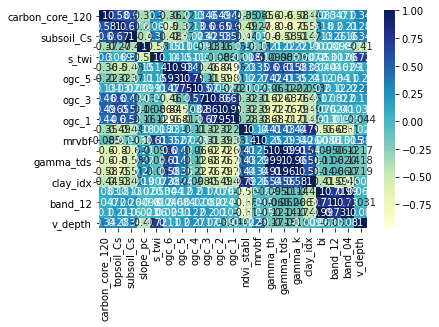

In [27]:
# # plotting correlation heatmap - all CEAS
heatmap_df = df.drop(['core_numbe', 'CEA','strata_nam','period','property_name'],axis = 1)
heatmap_df.info()
dataplot = sns.heatmap(heatmap_df.corr(), cmap="YlGnBu", annot=True)
  
# # displaying heatmap
mp.show()

In [28]:
df.describe()

,CEA,strata_nam,core_numbe,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,3.890000e+02,3.890000e+02,...,3.890000e+02,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,2.920308,3.889460,6131.485861,101.816771,47.956638,41.942666,4.174899,8.131729,3.374230e+06,6.127840e+06,...,8.646912e+06,4.124041,14.959894,64.196806,1.557444,0.154044,0.062276,0.183244,0.078570,15.358081
std,1.266672,2.037184,423.147592,42.369004,16.371116,18.171380,1.903266,1.359968,2.703721e+03,2.096806e+03,...,2.219647e+06,1.914753,10.819098,43.895688,1.098181,0.049151,0.011726,0.032071,0.015784,15.606832
min,1.000000,1.000000,5464.000000,24.694681,17.790700,10.643030,0.179550,5.699690,3.368684e+06,6.122912e+06,...,4.752180e+06,0.133840,2.056410,12.757310,0.163250,0.026930,0.029840,0.096400,0.033600,1.019650
25%,2.000000,2.000000,5776.000000,70.474983,31.783200,25.241160,2.977090,7.046010,3.372082e+06,6.126496e+06,...,6.793668e+06,2.682090,5.891790,23.873820,0.455750,0.117630,0.054160,0.161400,0.067700,4.710300
50%,3.000000,4.000000,6123.000000,98.768325,50.867330,42.084570,4.105740,7.905800,3.374286e+06,6.127806e+06,...,8.224461e+06,3.991340,11.851510,53.140790,1.354240,0.147040,0.062750,0.184400,0.079500,9.486850
75%,4.000000,5.000000,6505.000000,128.177946,58.505900,55.840190,5.478130,9.059090,3.376189e+06,6.129314e+06,...,1.051730e+07,5.123430,22.318780,97.956310,2.650360,0.192930,0.069690,0.204600,0.088600,19.942100
max,5.000000,8.000000,6894.000000,231.715555,125.402730,84.975640,10.037920,12.298240,3.379781e+06,6.132439e+06,...,1.583669e+07,8.913330,44.017980,170.858430,3.734830,0.283380,0.105530,0.271400,0.132400,72.150700


array([[<AxesSubplot:title={'center':'CEA'}>,
        <AxesSubplot:title={'center':'strata_nam'}>,
        <AxesSubplot:title={'center':'core_numbe'}>,
        <AxesSubplot:title={'center':'carbon_core_120'}>,
        <AxesSubplot:title={'center':'topsoil_Cs'}>],
       [<AxesSubplot:title={'center':'subsoil_Cs'}>,
        <AxesSubplot:title={'center':'slope_pc'}>,
        <AxesSubplot:title={'center':'s_twi'}>,
        <AxesSubplot:title={'center':'ogc_6'}>,
        <AxesSubplot:title={'center':'ogc_5'}>],
       [<AxesSubplot:title={'center':'ogc_4'}>,
        <AxesSubplot:title={'center':'ogc_3'}>,
        <AxesSubplot:title={'center':'ogc_2'}>,
        <AxesSubplot:title={'center':'ogc_1'}>,
        <AxesSubplot:title={'center':'ndvi_stabl'}>],
       [<AxesSubplot:title={'center':'mrvbf'}>,
        <AxesSubplot:title={'center':'gamma_th'}>,
        <AxesSubplot:title={'center':'gamma_tds'}>,
        <AxesSubplot:title={'center':'gamma_k'}>,
        <AxesSubplot:title={'center':'cl

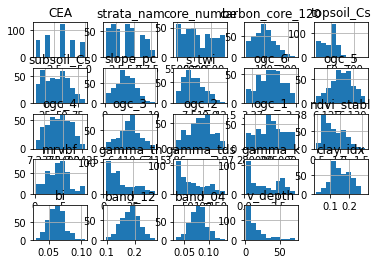

In [29]:
Core_SOC_df = df
Core_SOC_df.hist()

In [30]:
# Investigating drivers of Core_SOC

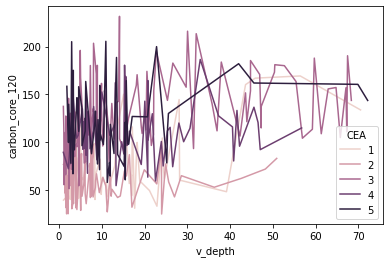

In [31]:
g = sns.lineplot(x ='v_depth', y =  'carbon_core_120',  hue = 'CEA', data = Core_SOC_df)

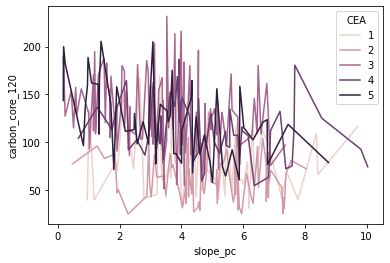

In [32]:
g = sns.lineplot(x ='slope_pc', y =  'carbon_core_120',  hue = 'CEA', data = Core_SOC_df)

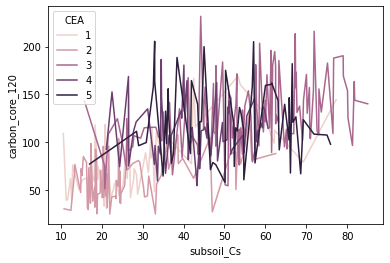

In [33]:
g = sns.lineplot(x ='subsoil_Cs', y =  'carbon_core_120',  hue = 'CEA', data = Core_SOC_df)

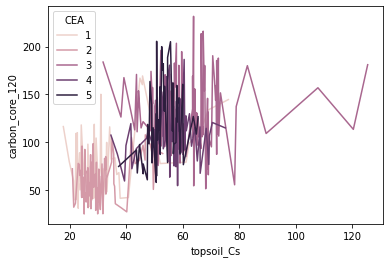

In [34]:
g = sns.lineplot(x ='topsoil_Cs', y =  'carbon_core_120', hue = 'CEA', data = Core_SOC_df)

In [35]:
df

,property_name,CEA,strata_nam,period,core_numbe,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
0,Bonnie Doone Property,1,1,T1,5464,83.495461,36.03293,32.05450,5.56868,6.84590,...,9415459.0,2.62721,20.80505,97.87849,2.77983,0.17190,0.06275,0.1898,0.0794,4.51403
1,Bonnie Doone Property,1,1,T1,5465,66.072313,36.69437,28.51077,8.42459,6.11087,...,8227138.0,1.81609,26.40673,110.56564,2.64108,0.16201,0.06295,0.2038,0.0802,2.45615
2,Bonnie Doone Property,1,1,T1,5466,99.682242,33.11657,31.95604,4.57981,8.82289,...,8048531.0,4.56878,27.02259,113.34035,2.69087,0.20499,0.06088,0.1751,0.0795,18.27759
3,Bonnie Doone Property,1,1,T1,5467,41.952111,40.79656,27.02616,7.24964,6.33211,...,7866613.0,1.55527,28.66734,114.05368,2.66351,0.14616,0.07887,0.2310,0.1005,2.57038
4,Bonnie Doone Property,1,1,T1,5468,55.243882,31.71140,25.24116,4.65329,6.79252,...,11132256.0,1.81448,26.30400,109.98004,2.63484,0.21220,0.05397,0.1563,0.0642,1.99834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,Bonnie Doone Property,5,7,T1,6888,66.820412,46.02749,68.61643,5.40636,6.45001,...,10880726.0,3.37569,15.89302,70.75943,1.91992,0.18850,0.06643,0.2202,0.0791,3.27718
385,Bonnie Doone Property,5,7,T1,6890,123.539006,50.89877,56.12559,6.78138,7.49922,...,6164271.5,4.56141,11.27141,53.14079,1.50609,0.12940,0.07214,0.2162,0.0926,9.11843
386,Bonnie Doone Property,5,7,T1,6891,91.887217,43.65667,63.37782,5.64795,6.16976,...,11270256.0,0.54177,13.13902,57.63135,1.49062,0.14357,0.06741,0.2067,0.0823,3.59696
387,Bonnie Doone Property,5,7,T1,6892,97.510458,44.74040,50.21032,3.19688,9.53379,...,8659736.0,5.95592,12.81248,72.81287,2.66280,0.11266,0.07973,0.2474,0.1032,10.38832


In [39]:
key_traits_df = df.drop(['property_name','CEA','period','strata_nam','core_numbe'], axis = 1)
key_traits_df

,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,ogc_4,ogc_3,ogc_2,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
0,83.495461,36.03293,32.05450,5.56868,6.84590,3375476.50,6128493.0,7239385,6410489.5,3863908.50,...,9415459.0,2.62721,20.80505,97.87849,2.77983,0.17190,0.06275,0.1898,0.0794,4.51403
1,66.072313,36.69437,28.51077,8.42459,6.11087,3377924.25,6131373.0,7241925,6412009.5,3864000.75,...,8227138.0,1.81609,26.40673,110.56564,2.64108,0.16201,0.06295,0.2038,0.0802,2.45615
2,99.682242,33.11657,31.95604,4.57981,8.82289,3378076.75,6131357.0,7241745,6411713.5,3863668.25,...,8048531.0,4.56878,27.02259,113.34035,2.69087,0.20499,0.06088,0.1751,0.0795,18.27759
3,41.952111,40.79656,27.02616,7.24964,6.33211,3376703.50,6129888.5,7240575,6411155.0,3863871.50,...,7866613.0,1.55527,28.66734,114.05368,2.66351,0.14616,0.07887,0.2310,0.1005,2.57038
4,55.243882,31.71140,25.24116,4.65329,6.79252,3377923.25,6131401.0,7241975,6412067.5,3864051.75,...,11132256.0,1.81448,26.30400,109.98004,2.63484,0.21220,0.05397,0.1563,0.0642,1.99834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,66.820412,46.02749,68.61643,5.40636,6.45001,3369580.50,6123611.0,7236825,6410937.5,3867244.50,...,10880726.0,3.37569,15.89302,70.75943,1.91992,0.18850,0.06643,0.2202,0.0791,3.27718
385,123.539006,50.89877,56.12559,6.78138,7.49922,3371630.75,6125522.5,7238085,6411208.5,3866454.25,...,6164271.5,4.56141,11.27141,53.14079,1.50609,0.12940,0.07214,0.2162,0.0926,9.11843
386,91.887217,43.65667,63.37782,5.64795,6.16976,3369505.25,6123590.5,7236865,6411027.0,3867359.75,...,11270256.0,0.54177,13.13902,57.63135,1.49062,0.14357,0.06741,0.2067,0.0823,3.59696
387,97.510458,44.74040,50.21032,3.19688,9.53379,3371033.00,6124467.0,7236855,6410133.5,3865822.00,...,8659736.0,5.95592,12.81248,72.81287,2.66280,0.11266,0.07973,0.2474,0.1032,10.38832


In [38]:
Core_SOC_df

,property_name,CEA,strata_nam,period,core_numbe,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
0,Bonnie Doone Property,1,1,T1,5464,83.495461,36.03293,32.05450,5.56868,6.84590,...,9415459.0,2.62721,20.80505,97.87849,2.77983,0.17190,0.06275,0.1898,0.0794,4.51403
1,Bonnie Doone Property,1,1,T1,5465,66.072313,36.69437,28.51077,8.42459,6.11087,...,8227138.0,1.81609,26.40673,110.56564,2.64108,0.16201,0.06295,0.2038,0.0802,2.45615
2,Bonnie Doone Property,1,1,T1,5466,99.682242,33.11657,31.95604,4.57981,8.82289,...,8048531.0,4.56878,27.02259,113.34035,2.69087,0.20499,0.06088,0.1751,0.0795,18.27759
3,Bonnie Doone Property,1,1,T1,5467,41.952111,40.79656,27.02616,7.24964,6.33211,...,7866613.0,1.55527,28.66734,114.05368,2.66351,0.14616,0.07887,0.2310,0.1005,2.57038
4,Bonnie Doone Property,1,1,T1,5468,55.243882,31.71140,25.24116,4.65329,6.79252,...,11132256.0,1.81448,26.30400,109.98004,2.63484,0.21220,0.05397,0.1563,0.0642,1.99834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,Bonnie Doone Property,5,7,T1,6888,66.820412,46.02749,68.61643,5.40636,6.45001,...,10880726.0,3.37569,15.89302,70.75943,1.91992,0.18850,0.06643,0.2202,0.0791,3.27718
385,Bonnie Doone Property,5,7,T1,6890,123.539006,50.89877,56.12559,6.78138,7.49922,...,6164271.5,4.56141,11.27141,53.14079,1.50609,0.12940,0.07214,0.2162,0.0926,9.11843
386,Bonnie Doone Property,5,7,T1,6891,91.887217,43.65667,63.37782,5.64795,6.16976,...,11270256.0,0.54177,13.13902,57.63135,1.49062,0.14357,0.06741,0.2067,0.0823,3.59696
387,Bonnie Doone Property,5,7,T1,6892,97.510458,44.74040,50.21032,3.19688,9.53379,...,8659736.0,5.95592,12.81248,72.81287,2.66280,0.11266,0.07973,0.2474,0.1032,10.38832


In [40]:
from pycaret.regression import *

exp_reg = setup(key_traits_df
,target='carbon_core_120'
,normalize = False 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='Prop_0-120_ML'
#,ignore_features = ['SOC_(%)']
#, transformation = True, transform_target = True	# this changes r2 down
# ,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.20
, remove_multicollinearity = True
, multicollinearity_threshold = 0.50
, transform_target = True
# , transformation = True
#, pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_120
2,Original Data,"(389, 21)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(272, 4)"


In [42]:
compare_models()
# first run of df3 = R2 = 0.48
# ignore features - , ignore_features = ['B04Jun2020'] #,'slope_percent','gamma_u'] R2 = 0.4857
# ,ignore_features = ['B04Jun2020','slope_percent'] #,'gamma_u'] R2 = 0.4857
# ,ignore_features = ['B04Jun2020','slope_percent','gamma_u'] R2 = 0.4857
#, transformation = True, 		R2 from = 0.4857 to 0.4682
# transform_target = True, 		R2 from = 0.4682 to 0.3966
###### transform and transform target don't improve results
# , remove_multicollinearity = True - turn off multicollin	R2 from = 0.4857 to 0.4857
# ,multicollinearity_threshold = 0.95 	R2 from = 0.4857 to 0.4857
# ,multicollinearity_threshold = 0.25	R2 from = 0.4857 to 0.4959
# ,multicollinearity_threshold = 0.05	R2 from = 0.4959 to 0.4959
#,normalize = True, turned off 		R2 from = 0.4959 to 0.4959
# feature_sel_threshold = 0.9 to 0.20	R2 from = 0.4959 to 0.4959

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
# try collinearity threthold - chnaged to 0.5 and see if the model peforms better
# R2 = 0.5441
# try w only 3 input variables 	0.5436
# transform target = True 	R2 from = 0.5436 to 0.5412
# remove outliers 	 	R2 from = 0.5412 0.5365	
# transformation = True 	R2 from = 0.5365 to 	0.5050	
# add CEA and strata name 	R2 from = 0.5050 0.5412
# NATR 	- normalise = false (CEA, strata name inc)	R2 0.3820	
# NATR 	- normalise = F (key_traits only - CEA, strata name exlu)	R2 0.3803	




,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,24.8837,992.3503,31.4361,0.3808,0.3271,0.2892,0.0220
ridge,Ridge Regression,24.8837,992.3625,31.4363,0.3808,0.3271,0.2892,0.0070
lar,Least Angle Regression,24.8837,992.3502,31.4361,0.3808,0.3271,0.2892,0.0140
rf,Random Forest Regressor,24.8337,1022.2192,31.7289,0.3746,0.3326,0.2875,0.0920
br,Bayesian Ridge,25.0784,1017.7167,31.8408,0.3674,0.3272,0.2902,0.0070
en,Elastic Net,25.1776,1028.8183,32.0208,0.3606,0.3282,0.2914,0.0080
et,Extra Trees Regressor,25.2257,1048.3424,32.1328,0.3600,0.3343,0.2915,0.0730
ada,AdaBoost Regressor,25.3419,1029.7921,31.9814,0.3586,0.3361,0.3001,0.0450
lasso,Lasso Regression,25.2475,1038.9463,32.1894,0.3541,0.3297,0.2926,0.0070
omp,Orthogonal Matching Pursuit,25.8909,1089.7931,32.9668,0.3242,0.3360,0.2976,0.0070


PowerTransformedTargetRegressor(copy_X=True, fit_intercept=True, n_jobs=-1,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=LinearRegression(copy_X=True,
                                                           fit_intercept=True,
                                                           n_jobs=-1,
                                                           normalize=False))

In [44]:
model = create_model('lr', round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24.35,1012.89,31.83,0.40,0.32,0.29
1,24.72,990.52,31.47,0.37,0.28,0.23
2,23.39,832.48,28.85,0.31,0.30,0.25
3,26.00,1236.17,35.16,0.42,0.33,0.29
4,25.63,1058.49,32.53,0.55,0.35,0.32
5,22.28,768.95,27.73,0.45,0.29,0.26
6,26.14,1014.04,31.84,0.06,0.39,0.35
7,24.56,899.34,29.99,0.57,0.31,0.29
8,24.73,1006.23,31.72,0.37,0.32,0.28
9,27.03,1104.40,33.23,0.31,0.39,0.34


In [45]:
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24.3547,1012.8869,31.8259,0.3956,0.3163,0.2859
1,24.7239,990.5234,31.4726,0.3662,0.2771,0.2271
2,23.3877,832.4800,28.8527,0.3078,0.3041,0.2547
3,25.9999,1236.1741,35.1593,0.4187,0.3285,0.2904
4,25.6255,1058.4877,32.5344,0.5481,0.3545,0.3212
5,22.2829,768.9496,27.7299,0.4526,0.2875,0.2592
6,26.1365,1014.0399,31.8440,0.0647,0.3867,0.3495
7,24.5590,899.3374,29.9890,0.5727,0.3087,0.2888
8,24.7319,1006.2261,31.7211,0.3675,0.3198,0.2769
9,27.0346,1104.3973,33.2325,0.3144,0.3877,0.3381


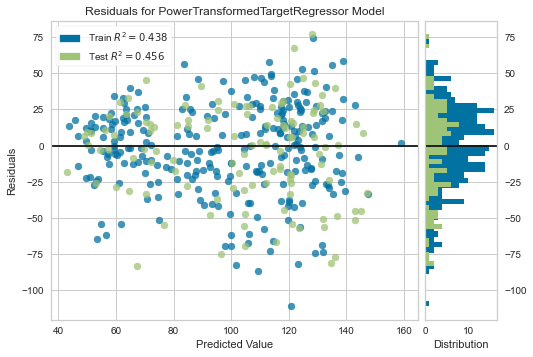

In [46]:
tuned = tuned_model
plot_model(tuned)
# train BODO - 120 = 0.58, test = 0.44

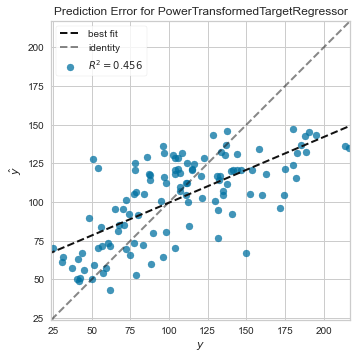

In [47]:
plot_model(tuned, plot = 'error')

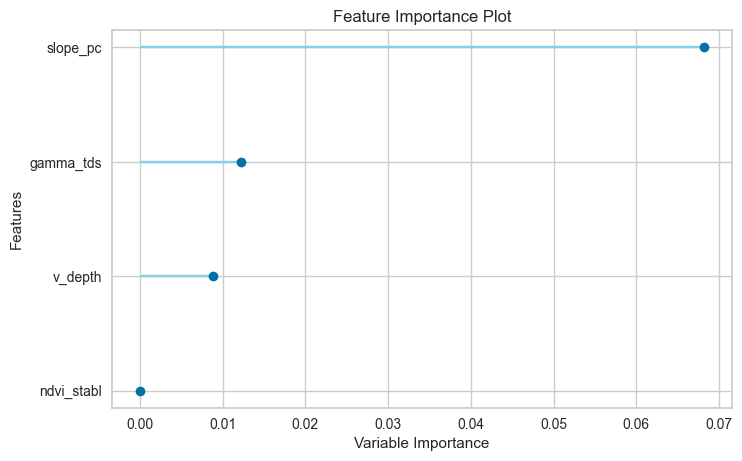

In [48]:
plot_model(tuned, plot = 'feature')

In [24]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [49]:
from pycaret.regression import *

exp_reg = setup(key_traits_df
,target='carbon_core_120'
,normalize = True 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='Prop_0-120_ML'
#,ignore_features = ['SOC_(%)']
#, transformation = True, transform_target = True	# this changes r2 down
# ,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.20
, remove_multicollinearity = True
, multicollinearity_threshold = 0.50
, transform_target = True
# , transformation = True
#, pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_120
2,Original Data,"(389, 21)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(272, 3)"


In [50]:
compare_models()
# first run of df3 = R2 = 0.48
# ignore features - , ignore_features = ['B04Jun2020'] #,'slope_percent','gamma_u'] R2 = 0.4857
# ,ignore_features = ['B04Jun2020','slope_percent'] #,'gamma_u'] R2 = 0.4857
# ,ignore_features = ['B04Jun2020','slope_percent','gamma_u'] R2 = 0.4857
#, transformation = True, 		R2 from = 0.4857 to 0.4682
# transform_target = True, 		R2 from = 0.4682 to 0.3966
###### transform and transform target don't improve results
# , remove_multicollinearity = True - turn off multicollin	R2 from = 0.4857 to 0.4857
# ,multicollinearity_threshold = 0.95 	R2 from = 0.4857 to 0.4857
# ,multicollinearity_threshold = 0.25	R2 from = 0.4857 to 0.4959
# ,multicollinearity_threshold = 0.05	R2 from = 0.4959 to 0.4959
#,normalize = True, turned off 		R2 from = 0.4959 to 0.4959
# feature_sel_threshold = 0.9 to 0.20	R2 from = 0.4959 to 0.4959

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
# try collinearity threthold - chnaged to 0.5 and see if the model peforms better
# R2 = 0.5441
# try w only 3 input variables 	0.5436
# transform target = True 	R2 from = 0.5436 to 0.5412
# remove outliers 	 	R2 from = 0.5412 0.5365	
# transformation = True 	R2 from = 0.5365 to 	0.5050	
# add CEA and strata name 	R2 from = 0.5050 0.5412
# NATR 	- normalise = false (CEA, strata name inc)	R2 0.3820	
# NATR 	- normalise = F (key_traits only - CEA, strata name exlu)	R2 0.3803	
# NATR 	- normalise = True (key_traits only - CEA, strata name exlu)	R2 0.37	




,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,24.7790,1003.5873,31.6149,0.3762,0.3278,0.2897,0.0070
ridge,Ridge Regression,24.7897,1003.3642,31.6122,0.3760,0.3277,0.2894,0.0200
lr,Linear Regression,24.7938,1003.3846,31.6128,0.3759,0.3277,0.2893,0.0810
lar,Least Angle Regression,24.7938,1003.3845,31.6128,0.3759,0.3277,0.2893,0.0060
huber,Huber Regressor,24.8535,1004.2882,31.6271,0.3746,0.3281,0.2898,0.0060
ada,AdaBoost Regressor,25.2850,1023.4857,31.9147,0.3593,0.3367,0.2965,0.0410
gbr,Gradient Boosting Regressor,25.1560,1057.4826,32.4326,0.3388,0.3376,0.2921,0.0380
rf,Random Forest Regressor,25.6898,1080.2920,32.6914,0.3338,0.3400,0.2948,0.0820
omp,Orthogonal Matching Pursuit,25.8909,1089.7930,32.9668,0.3242,0.3360,0.2976,0.0180
et,Extra Trees Regressor,26.4723,1151.8116,33.7187,0.2940,0.3467,0.2989,0.0600


PowerTransformedTargetRegressor(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                                compute_score=False, copy_X=True,
                                fit_intercept=True, lambda_1=1e-06,
                                lambda_2=1e-06, lambda_init=None, n_iter=300,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=BayesianRidge(alpha_1=1e-06,
                                                        alpha_2=1e-06,
                                                        alpha_init=None,
                                                        compute_score=False,
                                                        copy_X=True,
                                                        fit_intercept=True,
                                                        lambda_1=1e-06,
               

In [55]:
model = create_model('br', round = 2)
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24.1794,1031.6095,32.1187,0.3845,0.3218,0.2879
1,23.8756,941.8218,30.6891,0.3974,0.2691,0.2196
2,23.6870,852.7933,29.2026,0.2909,0.3085,0.2610
3,25.7867,1232.3055,35.1042,0.4205,0.3304,0.2924
4,25.6524,1115.0292,33.3921,0.5240,0.3585,0.3191
5,22.0782,760.0717,27.5694,0.4589,0.2930,0.2629
6,26.1054,995.9098,31.5580,0.0814,0.3718,0.3485
7,25.1150,977.1847,31.2600,0.5358,0.3282,0.3025
8,24.8394,1045.4198,32.3330,0.3429,0.3141,0.2683
9,26.4485,1084.5363,32.9323,0.3267,0.3836,0.3357


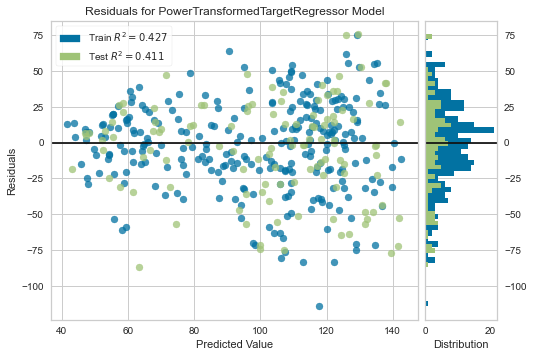

In [57]:
tuned = tuned_model
plot_model(tuned)